### Data

A high-quality dataset from a university medical hospital is used and will come from the UCI Machine Learning repository.

### Deliverables

Supervised and unsupervised learning methods will be used; includes but not limited to: K-nearest neighbors, logistic regression, decision trees, and support vector machines). I will be using the dataset and data analysis to investigate the data, using different ML models, and compare how to predict the breast cancer, whether it is malignant or benign, with maximum accuracy.

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_validate,train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, mean_squared_error, plot_confusion_matrix, ConfusionMatrixDisplay,  precision_recall_curve, roc_curve
from sklearn.metrics import RocCurveDisplay, classification_report
from sklearn.impute import KNNImputer
from sklearn.linear_model  import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.svm import SVC
from sklearn import set_config

import plotly.express as px
import plotly.io as pio

import time

In [2]:
from sklearn.datasets import load_digits

The data is loaded below.

In [3]:
medical_org = pd.read_csv('data\\medical.csv')
#digits, labels = load_digits(return_X_y=True)
medical_org["Class"] = medical_org["Class"].map({2:0,4:1})

In [4]:
medical_org.head()

Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  arginal Adhesion   Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0           1                3                1        1      0  
1          10                3                2        1      0  
2           2                3                1        1      0  
3           4                3                7        1      0  
4           1                3                1        1      0

In [5]:
medical_org.drop(['Sample code number'], axis=1, inplace=True)
medical_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   arginal Adhesion             699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [6]:
medical = medical_org[pd.to_numeric(medical_org['Bare Nuclei'], errors='coerce').notnull()].copy()
medical['Bare Nuclei'] = medical['Bare Nuclei'].astype(np.int64)
medical.dropna(inplace=True)

In [7]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   arginal Adhesion             683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 58.7 KB


In [8]:
medical.groupby(['Class']).size()

Class
0    444
1    239
dtype: int64

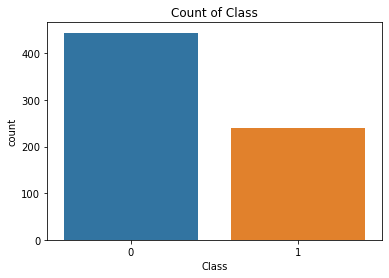

In [9]:
sns.countplot(data=medical, x = 'Class')
plt.title('Count of Class');

In [10]:
fig=px.density_heatmap(medical, x = "Class", 
           y = "Clump Thickness", marginal_x = "histogram", marginal_y = "histogram",
           title = "Heatmap for Class vs. Clump Thickness")
fig.show()
fig.write_image("images/ClassClumpThickness.png")

array([[<AxesSubplot:title={'center':'Clump Thickness'}>,
        <AxesSubplot:title={'center':'Uniformity of Cell Size'}>],
       [<AxesSubplot:title={'center':'Uniformity of Cell Shape'}>,
        <AxesSubplot:title={'center':'arginal Adhesion '}>],
       [<AxesSubplot:title={'center':'Single Epithelial Cell Size'}>,
        <AxesSubplot:title={'center':'Bare Nuclei'}>],
       [<AxesSubplot:title={'center':'Bland Chromatin'}>,
        <AxesSubplot:title={'center':'Normal Nucleoli'}>],
       [<AxesSubplot:title={'center':'Mitoses'}>,
        <AxesSubplot:title={'center':'Class'}>]], dtype=object)

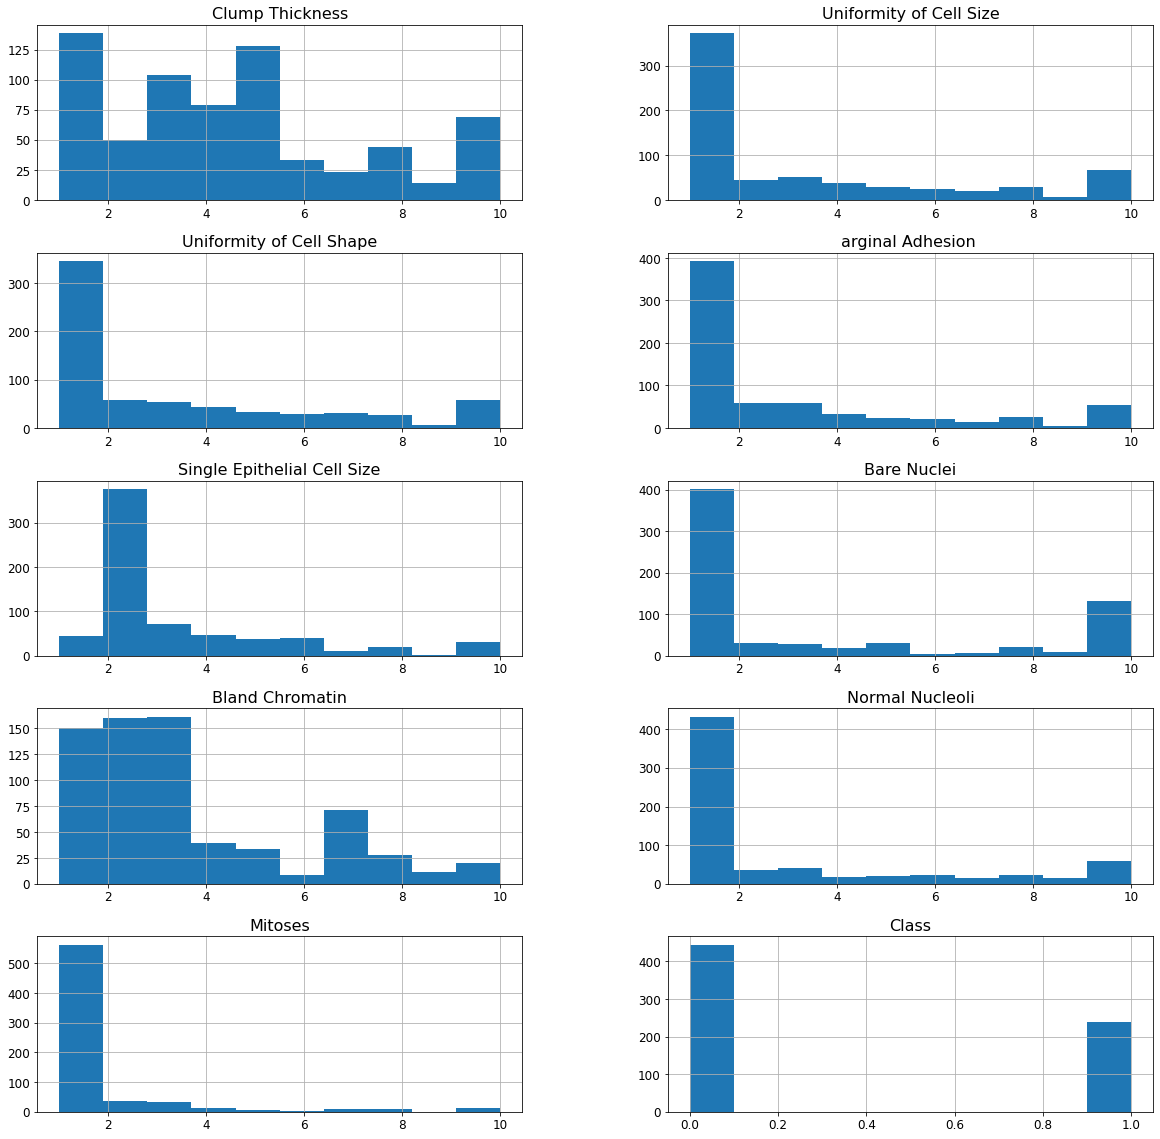

In [11]:
import matplotlib
params = {'axes.titlesize':'16',
          'xtick.labelsize':'12',
          'ytick.labelsize':'12'}
matplotlib.rcParams.update(params)
medical.hist(figsize=(20,20), layout=(5,2))

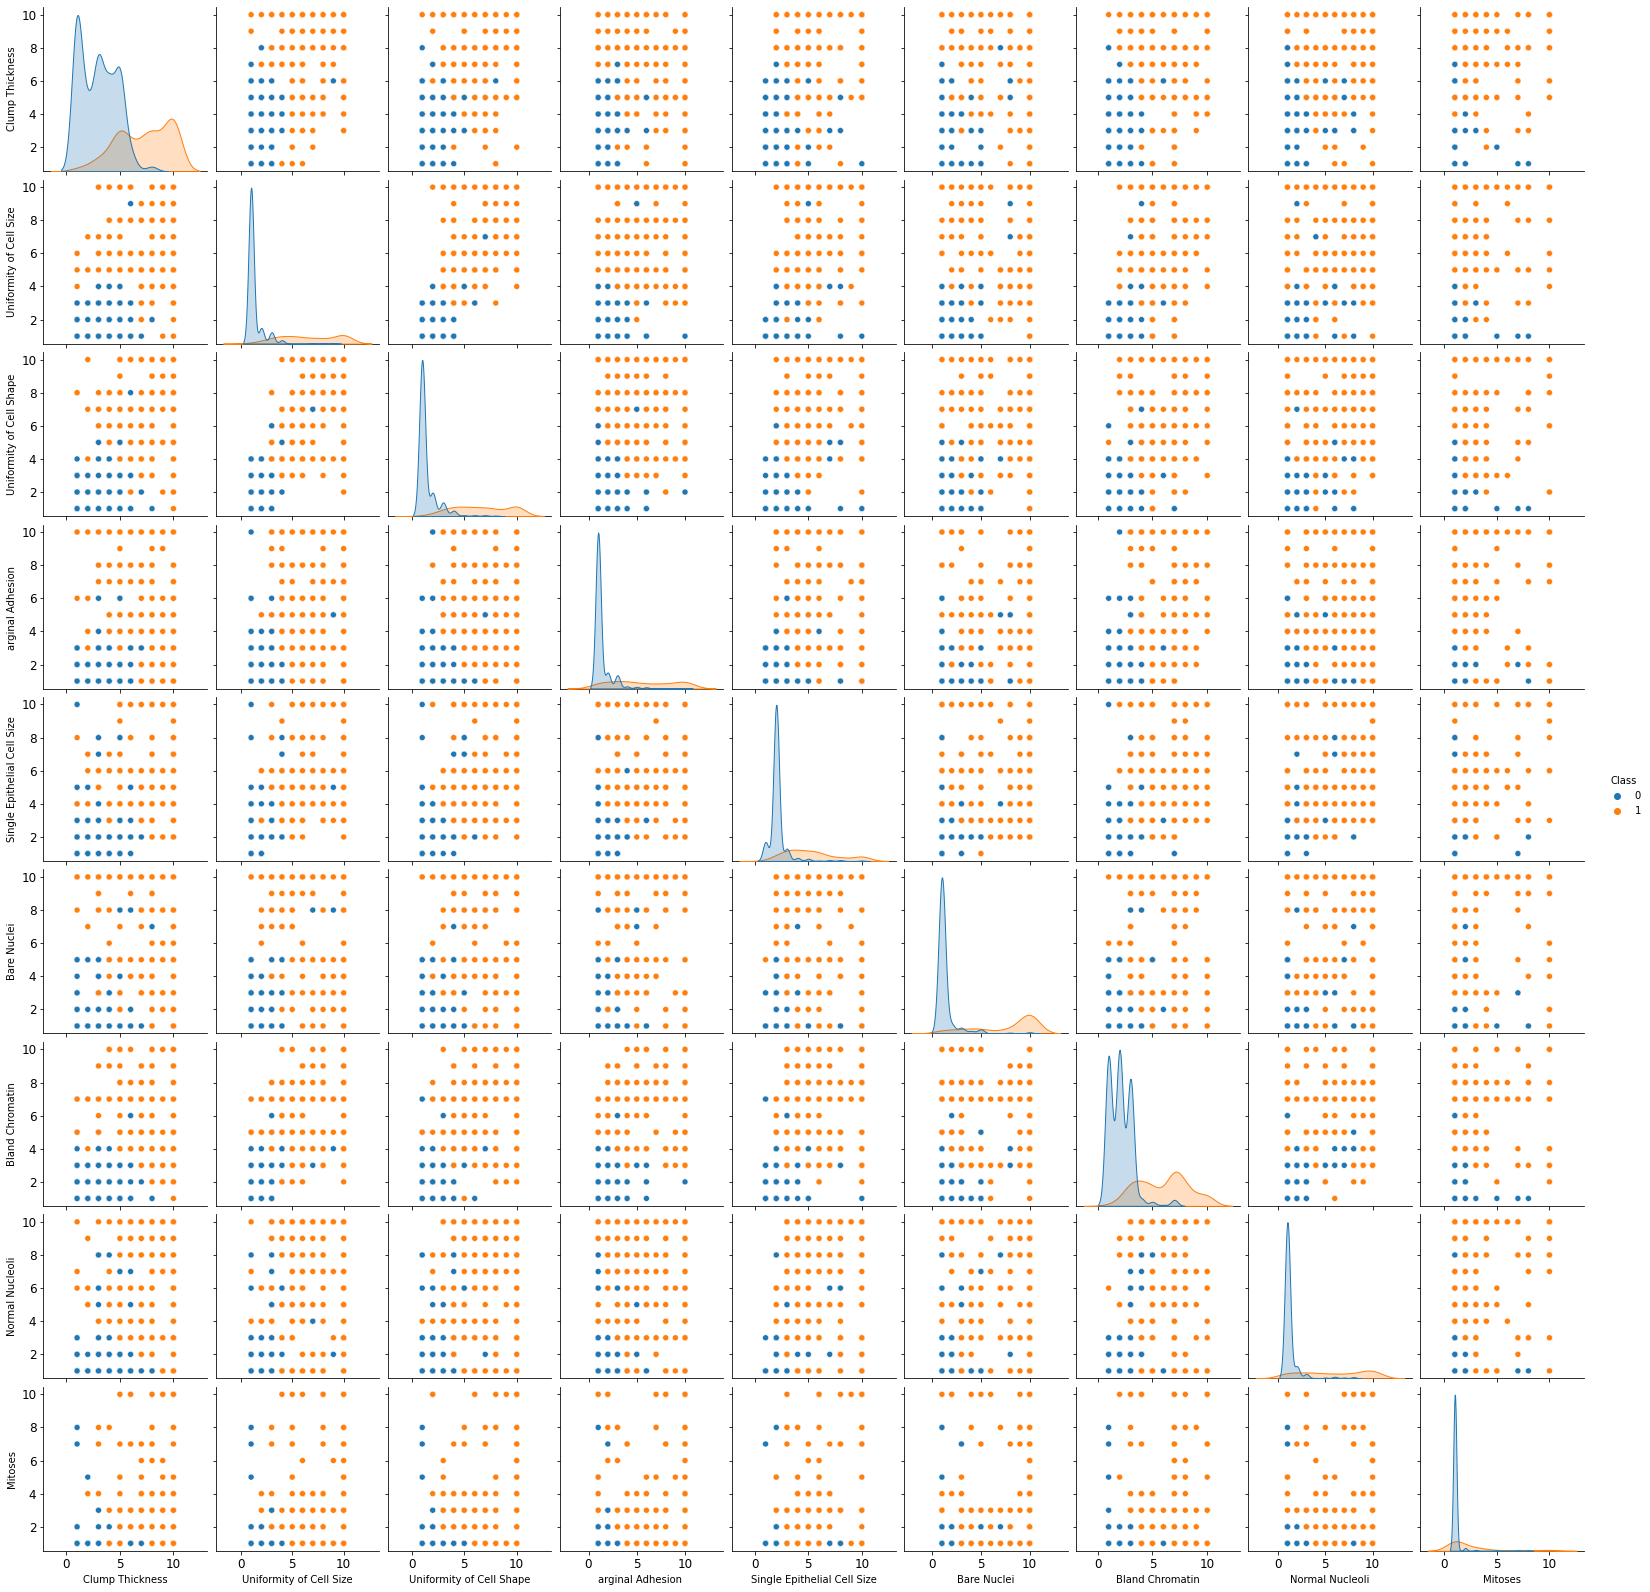

In [12]:
sns.pairplot(data=medical, hue='Class')

In [13]:
medical.corr()[['Class']].sort_values(by=['Class'], ascending=False)

Class
Class                        1.000000
Bare Nuclei                  0.822696
Uniformity of Cell Shape     0.821891
Uniformity of Cell Size      0.820801
Bland Chromatin              0.758228
Normal Nucleoli              0.718677
Clump Thickness              0.714790
arginal Adhesion             0.706294
Single Epithelial Cell Size  0.690958
Mitoses                      0.423448

In [14]:
X=medical[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','arginal Adhesion ','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin'
           ,'Normal Nucleoli','Mitoses']]
y=medical['Class']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

The Complexity that minimized Test Error was: 2
[0.0314454706689742, 0.021626646510477864, 0.004429121129198769, 3.457794414635004e-27, 4.904829489246745e-27]
[0.050086904570094314, 0.03665248418714831, 5.101312514388305, 83.23123629078825, 230.6897687274016]


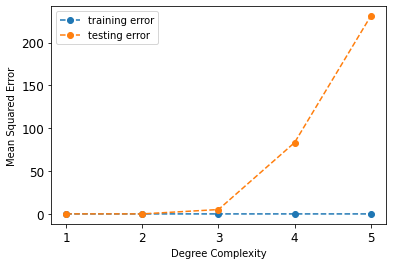

In [16]:
train_mses = []
test_mses = []

for i in range(1, 6):
    pipe = Pipeline([('pfeat', PolynomialFeatures(degree = i, include_bias=False)), 
                    ('linreg', LinearRegression())])
    pipe.fit(X_train, y_train)
    train_preds = pipe.predict(X_train)
    test_preds  = pipe.predict(X_test)
    train_mses.append(mean_squared_error(y_train, train_preds))
    test_mses.append(mean_squared_error(y_test, test_preds))

print(f'The Complexity that minimized Test Error was: {test_mses.index(min(test_mses)) + 1}')
plt.plot(range(1, 6), train_mses, '--o', label = 'training error')
plt.plot(range(1, 6), test_mses, '--o', label = 'testing error')
plt.xticks(range(1, 6), range(1, 6))
plt.xlabel('Degree Complexity')
plt.ylabel('Mean Squared Error')
plt.legend()
print(train_mses)
print(test_mses)

In [17]:
parms = {'poly__degree': np.arange(2, 6)}

pipe_ex = Pipeline([('poly', PolynomialFeatures(include_bias=False)), ('linreg', LinearRegression())])
    
poly_grid = GridSearchCV(pipe_ex, parms, scoring='neg_mean_squared_error')
lin_pipe_fit = poly_grid.fit(X_train, y_train)
poly_preds = poly_grid.predict(X_test)

mse = mean_squared_error(y_test, poly_preds)

lin_best_score = lin_pipe_fit.score(X_test, y_test)
Poly_best = poly_grid.best_params_['poly__degree']
lin_best_score =  lin_pipe_fit.best_score_


print(f'The best score is: {lin_best_score: .2f}')
print(f'The best Poly degree is: {Poly_best: .2f}')
print(f'The best MSE is: {mse: .4f}')
print(f'Best score: {lin_best_score: .4f}')

The best score is: -0.04
The best Poly degree is:  2.00
The best MSE is:  0.0367
Best score: -0.0361


In [18]:
pipe_lin = Pipeline([('poly', PolynomialFeatures(degree = Poly_best,include_bias=False)), ('linreg', LinearRegression())])
    
lin_pipe_fit = pipe_lin.fit(X_train, y_train)

poly_preds = pipe_lin.predict(X_test)
s_lin = lin_pipe_fit.score(X_test, y_test)

mse = mean_squared_error(y_test, poly_preds)

lin_cv_result = cross_validate(pipe_lin, X_test, y_test, cv=5, n_jobs=5)

elapsed_time_lin = lin_cv_result['fit_time'].mean()
test_score_lin =  lin_cv_result['test_score'].mean()
feature_names = X_train.columns;

print(lin_cv_result)
print('----------------')
print(f'Elapsed during training: {elapsed_time_lin:.4f}s')
print(f'Test score is: {test_score_lin: .2f}')
print(f'Score is: {s_lin: .2f}')
print(f'MSE is: {mse: .2f}')
print('----------------')
r = permutation_importance(lin_pipe_fit, X_train, y_train,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if i < len(feature_names):
        print(f"{feature_names[i]:<8}"
               f"{r.importances_mean[i]: .3f}"
               f" +/- {r.importances_std[i]:.3f}")

{'fit_time': array([0.01499939, 0.01199365, 0.01099467, 0.04097509, 0.01599813]), 'score_time': array([0.00299931, 0.00300241, 0.00300241, 0.00400114, 0.00299931]), 'test_score': array([ 0.15675055,  0.72495544, -0.09750343,  0.68408535,  0.69639599])}
----------------
Elapsed during training: 0.0190s
Test score is:  0.43
Score is:  0.85
MSE is:  0.04
----------------
Bare Nuclei 0.371 +/- 0.023
Uniformity of Cell Size 0.215 +/- 0.020
Clump Thickness 0.077 +/- 0.007
Uniformity of Cell Shape 0.053 +/- 0.006
Bland Chromatin 0.040 +/- 0.005
Normal Nucleoli 0.039 +/- 0.005
arginal Adhesion  0.029 +/- 0.004
Mitoses  0.013 +/- 0.002
Single Epithelial Cell Size 0.007 +/- 0.001


In [19]:
ridge_param_dict = {'ridge__alpha': np.linspace(1, 30, 100)}

ridge_pipe = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict)
ridge_grid_fit=ridge_grid.fit(X_train, y_train)

ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)

ridge_best_score =  ridge_grid_fit.best_score_

print(f'Train MSE: {ridge_train_mse}')
print(f'Test MSE: {ridge_test_mse}')
print(f'Best score: {ridge_best_score: .4f}')

best_alpha = ridge_grid.best_params_
print(f'Best param:', best_alpha)

best_estimator = ridge_grid.best_estimator_
best_model = best_estimator.named_steps['ridge']
coefs = best_model.coef_

ridge_coeff = ridge_grid.best_estimator_.named_steps['ridge'].coef_
feature_names = X_train.columns;

df = pd.DataFrame(columns = ['Feature name', 'Ridge coeff'])
df['Feature name'] = feature_names
df['Ridge coeff'] = ridge_coeff
df.sort_values(by=['Ridge coeff'],ascending=False, inplace=True)
print(df)

Train MSE: 0.031595016439166956
Test MSE: 0.049086114310487615
Best score:  0.8479
Best param: {'ridge__alpha': 28.828282828282827}
                  Feature name  Ridge coeff
5                  Bare Nuclei     0.157969
0              Clump Thickness     0.080139
1      Uniformity of Cell Size     0.064746
2     Uniformity of Cell Shape     0.064479
6              Bland Chromatin     0.057440
7              Normal Nucleoli     0.054117
3            arginal Adhesion      0.020697
8                      Mitoses     0.009651
4  Single Epithelial Cell Size     0.004428


In [20]:
ridge_pipe = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(alpha = list(best_alpha.values())[0]))])

ridge_pipe_fit = ridge_pipe.fit(X_train, y_train)
ridge_preds = ridge_pipe_fit.predict(X_test)
s_ridge = ridge_pipe_fit.score(X_test, y_test)

mse = mean_squared_error(y_test, ridge_preds)

lin_cv_result = cross_validate(ridge_pipe, X_test, y_test, cv=5, n_jobs=5)

elapsed_time_ridge = lin_cv_result['fit_time'].mean()
test_score_ridge =  lin_cv_result['test_score'].mean()

print(lin_cv_result)
print('----------------')
print(f'Elapsed during training: {elapsed_time_ridge:.4f}s')
print(f'Test score is: {test_score_ridge: .2f}')
print(f'Score is: {s_ridge: .2f}')
print(f'MSE is: {mse: .2f}')
print('----------------')
r = permutation_importance(ridge_pipe_fit, X_train, y_train,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if i < len(feature_names):
        print(f"{feature_names[i]:<8}"
               f"{r.importances_mean[i]: .3f}"
               f" +/- {r.importances_std[i]:.3f}")

{'fit_time': array([0.00499797, 0.00399756, 0.00399995, 0.00500703, 0.00400758]), 'score_time': array([0.00200009, 0.00200009, 0.00100017, 0.00199246, 0.00199246]), 'test_score': array([0.8085948 , 0.80545643, 0.74330468, 0.77610225, 0.82831579])}
----------------
Elapsed during training: 0.0044s
Test score is:  0.79
Score is:  0.80
MSE is:  0.05
----------------
Bare Nuclei 0.233 +/- 0.017
Clump Thickness 0.058 +/- 0.006
Uniformity of Cell Size 0.038 +/- 0.006
Uniformity of Cell Shape 0.037 +/- 0.006
Bland Chromatin 0.031 +/- 0.005
Normal Nucleoli 0.028 +/- 0.004
arginal Adhesion  0.004 +/- 0.002
Mitoses  0.001 +/- 0.001
Single Epithelial Cell Size 0.000 +/- 0.000


In [21]:
lasso_pipe = Pipeline([('selector', SequentialFeatureSelector(Lasso())),
                                ('lasso', Lasso())])

param_dict = {'selector__n_features_to_select':[i for i in range(1,9)], 'lasso__alpha':np.linspace(0.01, 0.3, 10)}
lasso_grid = GridSearchCV(estimator = lasso_pipe, 
                                    param_grid  = param_dict)

lasso_grid_fit=lasso_grid.fit(X_train, y_train)
train_preds_lasso = lasso_grid.predict(X_train)
test_preds_lasso = lasso_grid.predict(X_test)

selector_train_mse_lasso = mean_squared_error(y_train, train_preds_lasso)
selector_test_mse_lasso = mean_squared_error(y_test, test_preds_lasso)
best_param = lasso_grid.best_params_

lasso_best_score =  lasso_grid_fit.best_score_

print(f'Train MSE: {selector_train_mse_lasso}')
print(f'Test MSE: {selector_test_mse_lasso}')
print(f'Best param to select:', best_param)
print(f'Best score: {lasso_best_score: .4f}')

best_estimator = lasso_grid.best_estimator_
best_selector = best_estimator.named_steps['selector']
best_model = best_estimator.named_steps['lasso']
feature_names = X_train.columns[best_selector.get_support()]
coefs = best_model.coef_

df_lasso = pd.DataFrame(columns = ['Feature name', 'Lasso coeff'])
df_lasso['Feature name'] = feature_names
df_lasso['Lasso coeff']  = coefs
df_lasso.sort_values(by=['Lasso coeff'],ascending=False, inplace=True)
print(df_lasso)

model = best_model.fit(X_train, y_train)
score = model.score(X_train, y_train)
print(f'score: {score}')

Train MSE: 0.03191619264377678
Test MSE: 0.049999994131388954
Best param to select: {'lasso__alpha': 0.042222222222222223, 'selector__n_features_to_select': 8}
Best score:  0.8472
                  Feature name  Lasso coeff
5                  Bare Nuclei     0.049605
0              Clump Thickness     0.025731
1      Uniformity of Cell Size     0.025115
2     Uniformity of Cell Shape     0.021572
7              Normal Nucleoli     0.018110
6              Bland Chromatin     0.016190
3            arginal Adhesion      0.002132
4  Single Epithelial Cell Size     0.000000
score: 0.8565169795680023


In [22]:
lasso_pipe = Pipeline([('selector', SequentialFeatureSelector(Lasso(alpha=list(best_param.values())[0]), 
                                                              n_features_to_select = list(best_param.values())[1])), 
                       ('lasso', Lasso(alpha=list(best_param.values())[0]))])

lasso_pipe_fit = lasso_pipe.fit(X_train, y_train)
lasso_preds = lasso_pipe_fit.predict(X_test)

s_lasso = lasso_pipe_fit.score(X_test, y_test)

mse = mean_squared_error(y_test, poly_preds)
lasso_cv_result = cross_validate(lasso_pipe, X_test, y_test, cv=5, n_jobs=5)

elapsed_time_lasso = lasso_cv_result['fit_time'].mean()
test_score_lasso =  lasso_cv_result['test_score'].mean()

print(lasso_cv_result)
print('----------------')
print(f'Elapsed during training: {elapsed_time_lasso:.4f}s')
print(f'Test score is: {test_score_lasso: .2f}')
print(f'Score is: {s_lasso: .2f}')
print(f'MSE is: {mse: .2f}')
print('----------------')
r = permutation_importance(lasso_pipe_fit, X_train, y_train,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if i < len(feature_names):
        print(f"{feature_names[i]:<8}"
               f"{r.importances_mean[i]: .3f}"
               f" +/- {r.importances_std[i]:.3f}")

{'fit_time': array([0.29900122, 0.31303167, 0.28700161, 0.30299568, 0.29399657]), 'score_time': array([0.00100017, 0.00199962, 0.00099874, 0.00099993, 0.00099969]), 'test_score': array([0.82958905, 0.79816745, 0.73279721, 0.7708648 , 0.81175835])}
----------------
Elapsed during training: 0.2992s
Test score is:  0.79
Score is:  0.79
MSE is:  0.04
----------------
Bare Nuclei 0.311 +/- 0.021
Uniformity of Cell Size 0.063 +/- 0.007
Clump Thickness 0.053 +/- 0.005
Uniformity of Cell Shape 0.045 +/- 0.006
Normal Nucleoli 0.033 +/- 0.005
Bland Chromatin 0.020 +/- 0.004
Single Epithelial Cell Size 0.000 +/- 0.000
arginal Adhesion  0.000 +/- 0.000


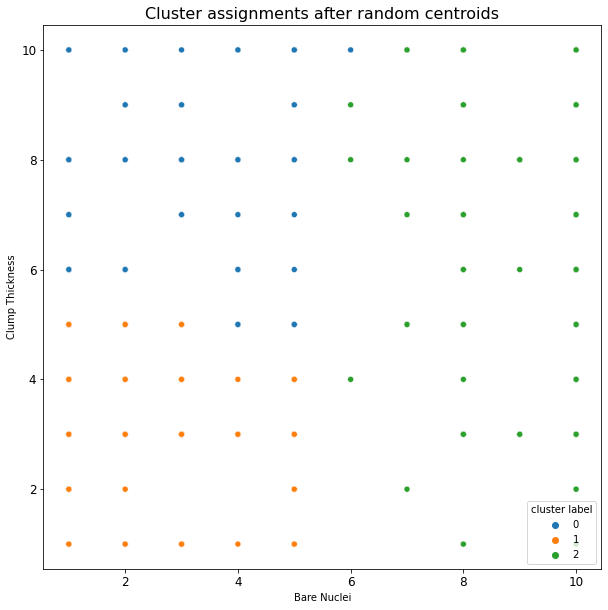

In [23]:
df_cluster = medical[['Bare Nuclei','Clump Thickness']].copy()

centroids = df_cluster.sample(3, random_state = 11).reset_index(drop = True)
centroids

c1 = centroids.iloc[0, :2].values
c2 = centroids.iloc[1, :2].values
c3 = centroids.iloc[2, :2].values

d1 = np.linalg.norm(df_cluster.iloc[:, :2] - c1, axis = 1)**2
d2 = np.linalg.norm(df_cluster.iloc[:, :2] - c2, axis = 1)**2
d3 = np.linalg.norm(df_cluster.iloc[:, :2] - c3, axis = 1)**2

dist_df = pd.DataFrame(np.array([d1, d2, d3]).T, columns = ['d1', 'd2', 'd3'])
dist_df

np.argmin(dist_df.values, axis = 1) #finding smallest variance
df_cluster['cluster label'] = np.argmin(dist_df.values, axis = 1) #create new column of labels
df_cluster

plt.figure(figsize = (10,10))
sns.scatterplot(data = df_cluster, x = 'Bare Nuclei',y = 'Clump Thickness', hue = 'cluster label', palette='tab10')
plt.title('Cluster assignments after random centroids');

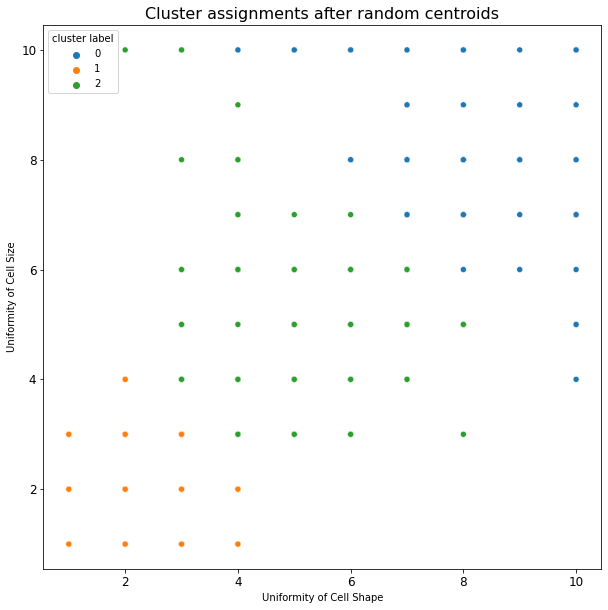

In [24]:
df_cluster = medical[['Uniformity of Cell Shape','Uniformity of Cell Size']].copy()

centroids = df_cluster.sample(3, random_state = 11).reset_index(drop = True)
centroids

c1 = centroids.iloc[0, :2].values
c2 = centroids.iloc[1, :2].values
c3 = centroids.iloc[2, :2].values

d1 = np.linalg.norm(df_cluster.iloc[:, :2] - c1, axis = 1)**2
d2 = np.linalg.norm(df_cluster.iloc[:, :2] - c2, axis = 1)**2
d3 = np.linalg.norm(df_cluster.iloc[:, :2] - c3, axis = 1)**2

dist_df = pd.DataFrame(np.array([d1, d2, d3]).T, columns = ['d1', 'd2', 'd3'])
dist_df

np.argmin(dist_df.values, axis = 1) #finding smallest variance
df_cluster['cluster label'] = np.argmin(dist_df.values, axis = 1) #create new column of labels
df_cluster

plt.figure(figsize = (10,10))
sns.scatterplot(data = df_cluster, x = 'Uniformity of Cell Shape',y = 'Uniformity of Cell Size', hue = 'cluster label', palette='tab10')
plt.title('Cluster assignments after random centroids');

[0 1]


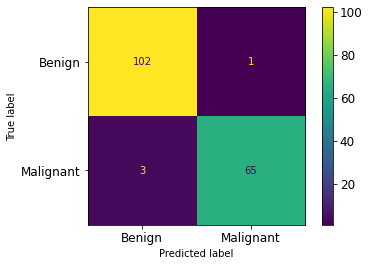

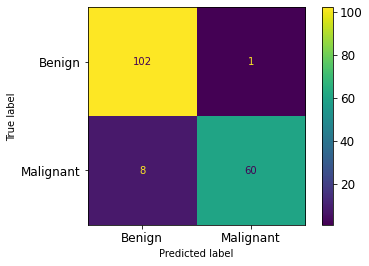

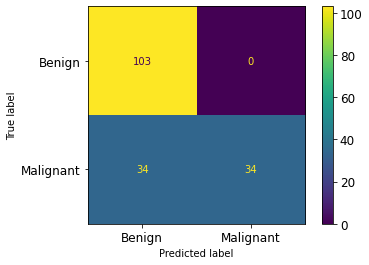

In [25]:
knn_ex = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors = 10))])
knn_ex.fit(X_train, y_train)
low_preds = np.where(knn_ex.predict_proba(X_test)[:, 1] > .25, 1, 0)
mid_preds = knn_ex.predict(X_test)
high_preds = np.where(knn_ex.predict_proba(X_test)[:, 1] > .95, 1, 0)

print(knn_ex.classes_)

ConfusionMatrixDisplay.from_predictions(y_test, low_preds,labels=[0, 1], display_labels=['Benign', 'Malignant'])
ConfusionMatrixDisplay.from_predictions(y_test, mid_preds, labels=[0, 1], display_labels=['Benign', 'Malignant'])
ConfusionMatrixDisplay.from_predictions(y_test, high_preds, labels=[0, 1], display_labels=['Benign', 'Malignant'])

In [26]:
recall_grid = GridSearchCV(knn_ex, param_grid = {'knn__n_neighbors': range(1, 23, 2)},
                   scoring = 'recall')
recall_grid.fit(X_train, y_train)
lr_preds = recall_grid.predict(X_test)
test_predictions = recall_grid.predict_proba(X_test)
ps= precision_score(y_test, lr_preds)
acs = accuracy_score(y_test, lr_preds)
rs = recall_score(y_test, lr_preds)

best_score = recall_grid.score(X_test, y_test)
n_neighbors_best = recall_grid.best_params_['knn__n_neighbors']

print(f'Accuracy score is: {acs: .2f}')
print(f'Recall score is: {rs: .2f}')
print(f'Precision_score is: {ps: .2f}')
print(f'The best score is: {best_score: .2f}')
print(f'The best n_neighbors is: {n_neighbors_best: .2f}')
print(classification_report(y_test, lr_preds, target_names=['Benign','Malignant']))

Accuracy score is:  0.95
Recall score is:  0.90
Precision_score is:  0.98
The best score is:  0.90
The best n_neighbors is:  9.00
              precision    recall  f1-score   support

      Benign       0.94      0.99      0.96       103
   Malignant       0.98      0.90      0.94        68

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



The roc_curve function takes in y_true and y_score which can be predicted probabilities. The function returns the false positive rates, true positive rates, and thresholds. Assign these to fpr, tpr, and thresh_rocs below.

False Positive Rates:  [0.         0.         0.         0.         0.00970874 0.00970874
 0.00970874 0.00970874 0.00970874 0.02912621 1.        ]
True Positive Rates:  [0.         0.51470588 0.75       0.85294118 0.86764706 0.89705882
 0.94117647 0.95588235 1.         1.         1.        ]
Thresholds:  [2.         1.         0.88888889 0.77777778 0.66666667 0.55555556
 0.44444444 0.33333333 0.22222222 0.11111111 0.        ]


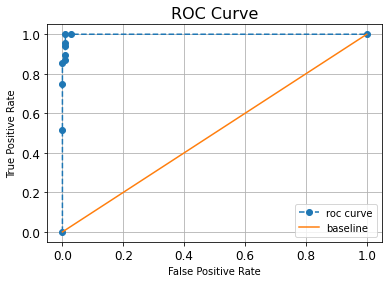

In [27]:
fpr, tpr, thresh_rocs = roc_curve(y_test, test_predictions[:, 1], pos_label = 1)

print('False Positive Rates: ', fpr)
print('True Positive Rates: ', tpr)
print('Thresholds: ', thresh_rocs )
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid();

Considering the proposed area under the curve scoring method, we construct a grid search named roc_grid that uses the knn_pipe and searches over the number of neighbors from 1 to 33 by odd values, choosing the model that optimizes roc_auc_score. We identify the optimal number of neighbors.

In [28]:
roc_grid = GridSearchCV(knn_ex, param_grid={'knn__n_neighbors': range(1, 33, 2)}, scoring = 'roc_auc')
roc_grid.fit(X_train, y_train)
best_n_neighbors = roc_grid.best_params_['knn__n_neighbors']

print(f'The best n_neighbors is: {best_n_neighbors}')

The best n_neighbors is: 27


Below, we use the RocCurveDisplay to display roc curves for three knn models. You can either use predictions or estimators to create the visualization. Below, we use the from_estimator metho

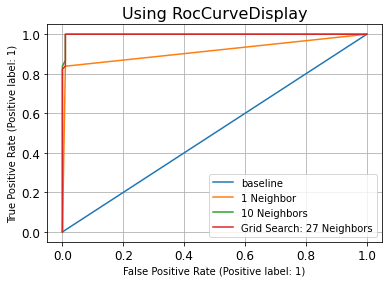

In [29]:
knn_1 = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors = 1))])
knn_1.fit(X_train, y_train)
fig, ax = plt.subplots()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
RocCurveDisplay.from_estimator(knn_1, X_test, y_test, ax = ax, label = '1 Neighbor')
RocCurveDisplay.from_estimator(knn_ex, X_test, y_test, pos_label = 1, ax = ax, label = '10 Neighbors')
RocCurveDisplay.from_estimator(roc_grid, X_test, y_test, pos_label = 1, ax = ax, label = 'Grid Search: 27 Neighbors')
plt.grid()
plt.title('Using RocCurveDisplay')
plt.legend();

In [30]:
lr_pipe = Pipeline([('scale', StandardScaler()), ('lr', LogisticRegression())])
lr_grid = GridSearchCV(lr_pipe, param_grid = {'lr__C': [0.001,0.01,0.1,1,10,100,1000]}, scoring = 'roc_auc')

lr_grid.fit(X_train, y_train)
lr_preds = lr_grid.predict(X_test)
test_predictions = lr_grid.predict_proba(X_test)
ps= precision_score(y_test, lr_preds)
acs = accuracy_score(y_test, lr_preds)
rs = recall_score(y_test, lr_preds)

best_score = lr_grid.score(X_test, y_test)
C_best = lr_grid.best_params_['lr__C']

print(f'Accuracy score is: {acs: .2f}')
print(f'Recall score is: {rs: .2f}')
print(f'Precision_score is: {ps: .2f}')
print(f'The best score is: {best_score: .2f}')
print(f'The best C is: {C_best: .2f}')
print(classification_report(y_test, lr_preds, target_names=['Benign','Malignant']))

Accuracy score is:  0.92
Recall score is:  0.81
Precision_score is:  0.98
The best score is:  1.00
The best C is:  0.01
              precision    recall  f1-score   support

      Benign       0.89      0.99      0.94       103
   Malignant       0.98      0.81      0.89        68

    accuracy                           0.92       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171



{'fit_time': array([0.00800061, 0.00700021, 0.00900102, 0.00699782, 0.00700235]), 'score_time': array([0.0030005 , 0.00200081, 0.00099826, 0.00200033, 0.00199699]), 'test_score': array([0.94285714, 0.88235294, 0.91176471, 0.88235294, 0.94117647])}
----------------
              precision    recall  f1-score   support

      Benign       0.89      0.99      0.94       103
   Malignant       0.98      0.81      0.89        68

    accuracy                           0.92       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171

Elapsed during training: 0.0076s
Accuracy score is:  0.92
Test score is:  0.91
MSE is:  0.08


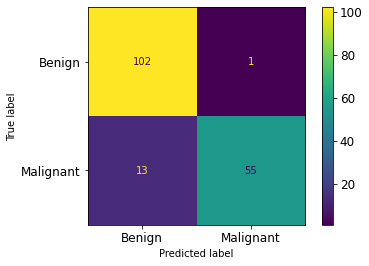

In [31]:
lr_pipe = Pipeline([('scale', StandardScaler()), ('lr', LogisticRegression(C=C_best))])

lr_pipe_fit = lr_pipe.fit(X_train, y_train)

lr_preds = lr_pipe_fit.predict(X_test)
acs_lr = accuracy_score(y_test, lr_preds)

cancer_confusion_mat = confusion_matrix(y_test, lr_preds, labels=[0, 1])
ConfusionMatrixDisplay.from_predictions(y_test, lr_preds, display_labels = ['Benign', 'Malignant'])

mse = mean_squared_error(y_test, lr_preds)
lr_cv_result = cross_validate(lr_pipe, X_test, y_test, cv=5, n_jobs=5)

elapsed_time_lr = lr_cv_result['fit_time'].mean()
test_score_lr =  lr_cv_result['test_score'].mean()

print(lr_cv_result)
print('----------------')
print(classification_report(y_test, lr_preds, target_names=['Benign', 'Malignant']))
print(f'Elapsed during training: {elapsed_time_lr:.4f}s')
print(f'Accuracy score is: {acs_lr: .2f}')
print(f'Test score is: {test_score_lr: .2f}')
print(f'MSE is: {mse: .2f}')

In [32]:
df = pd.DataFrame(columns = ['Feature name', 'Lr coeff'])
df['Feature name'] =X.columns
df['Lr coeff'] = lr_pipe['lr'].coef_[0]
df.sort_values(by=['Lr coeff'],ascending=False, inplace=True)
print(df)

                  Feature name  Lr coeff
5                  Bare Nuclei  0.439379
0              Clump Thickness  0.350903
2     Uniformity of Cell Shape  0.342239
1      Uniformity of Cell Size  0.323581
6              Bland Chromatin  0.320776
3            arginal Adhesion   0.270543
7              Normal Nucleoli  0.269996
4  Single Epithelial Cell Size  0.224170
8                      Mitoses  0.149162


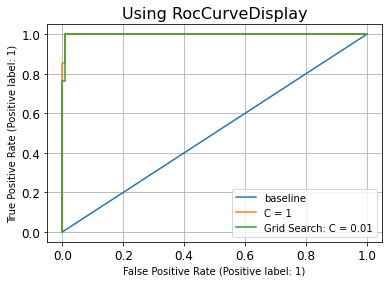

In [33]:
C_1 = Pipeline([('scale', StandardScaler()), ('lr', LogisticRegression(C = 1))])
C_1.fit(X_train, y_train)

fig, ax = plt.subplots()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
RocCurveDisplay.from_estimator(C_1, X_test, y_test, ax = ax, label = 'C = 1')
RocCurveDisplay.from_estimator(lr_grid, X_test, y_test, pos_label = 1, ax = ax, label = 'Grid Search: C = 0.01')
plt.grid()
plt.title('Using RocCurveDisplay')
plt.legend();

In [34]:
tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12,14,15,16,20,21],
             'min_samples_split': [2,5,10],
             'criterion': ['gini','entropy'],
             'min_samples_leaf': [1,5,10]
             }
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, param_grid = tree_para)#scoring = 'accuracy')

dt_grid_fit=dt_grid.fit(X_train, y_train)

preds = dt_grid.predict(X_test)
ps= precision_score(y_test, preds)
acs = accuracy_score(y_test, preds)
rs = recall_score(y_test, preds)

best_score = dt_grid.score(X_test, y_test)
param_best = dt_grid.best_params_
dt_best_score = dt_grid_fit.best_score_

print(f'Accuracy score is: {acs: .2f}')
print(f'Recall score is: {rs: .2f}')
print(f'Precision_score is: {ps: .2f}')
print(f'The best score is: {best_score: .2f}')
print(f'The best param is: {param_best}')
print(f'The best score is: {dt_best_score}')

print(classification_report(y_test, preds, target_names=['Benign', 'Malignant']))

Accuracy score is:  0.96
Recall score is:  0.96
Precision_score is:  0.96
The best score is:  0.96
The best param is: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}
The best score is: 0.964820102798401
              precision    recall  f1-score   support

      Benign       0.97      0.97      0.97       103
   Malignant       0.96      0.96      0.96        68

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



{'fit_time': array([0.00400686, 0.00301266, 0.00299883, 0.00300074, 0.00300074]), 'score_time': array([0.00198364, 0.00198364, 0.00099993, 0.00100017, 0.00100017]), 'test_score': array([0.91428571, 0.97058824, 0.88235294, 0.94117647, 0.97058824])}
----------------
|--- Uniformity of Cell Size <= 2.50
|   |--- Bare Nuclei <= 5.50
|   |   |--- Clump Thickness <= 6.50
|   |   |   |--- Bare Nuclei <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- Bare Nuclei >  4.50
|   |   |   |   |--- class: 0
|   |   |--- Clump Thickness >  6.50
|   |   |   |--- class: 1
|   |--- Bare Nuclei >  5.50
|   |   |--- class: 1
|--- Uniformity of Cell Size >  2.50
|   |--- Uniformity of Cell Shape <= 2.50
|   |   |--- Bland Chromatin <= 3.50
|   |   |   |--- class: 0
|   |   |--- Bland Chromatin >  3.50
|   |   |   |--- class: 1
|   |--- Uniformity of Cell Shape >  2.50
|   |   |--- Uniformity of Cell Size <= 4.50
|   |   |   |--- Bare Nuclei <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- Bare Nuc

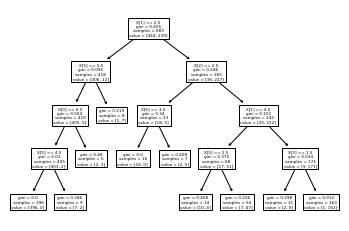

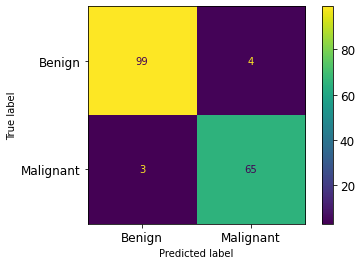

In [35]:
treeclass = DecisionTreeClassifier(criterion='gini',max_depth = param_best['max_depth'], min_samples_leaf = param_best['min_samples_leaf'], 
                                   min_samples_split = param_best['min_samples_split'])

tree1 = treeclass.fit(X, y)
tree1_plot = plot_tree(tree1)
depth_1 = export_text(tree1, feature_names = list(X.columns))

test_preds = tree1.predict(X_test)
acs_dt = accuracy_score(y_test, test_preds)

cancer_confusion_mat = confusion_matrix(y_test, test_preds, labels=[0, 1])
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, display_labels = ['Benign', 'Malignant'])

mse = mean_squared_error(y_test, lr_preds)
dt_cv_result = cross_validate(treeclass, X_test, y_test, cv=5, n_jobs=5)

elapsed_time_dt = dt_cv_result['fit_time'].mean()
test_score_dt =  dt_cv_result['test_score'].mean()

print(dt_cv_result)
print('----------------')
print(depth_1)

----------------
              precision    recall  f1-score   support

      Benign       0.97      0.96      0.97       103
   Malignant       0.94      0.96      0.95        68

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Elapsed during training: 0.0032s
Accuracy score: 0.9591s
Test score is:  0.94
MSE is:  0.08


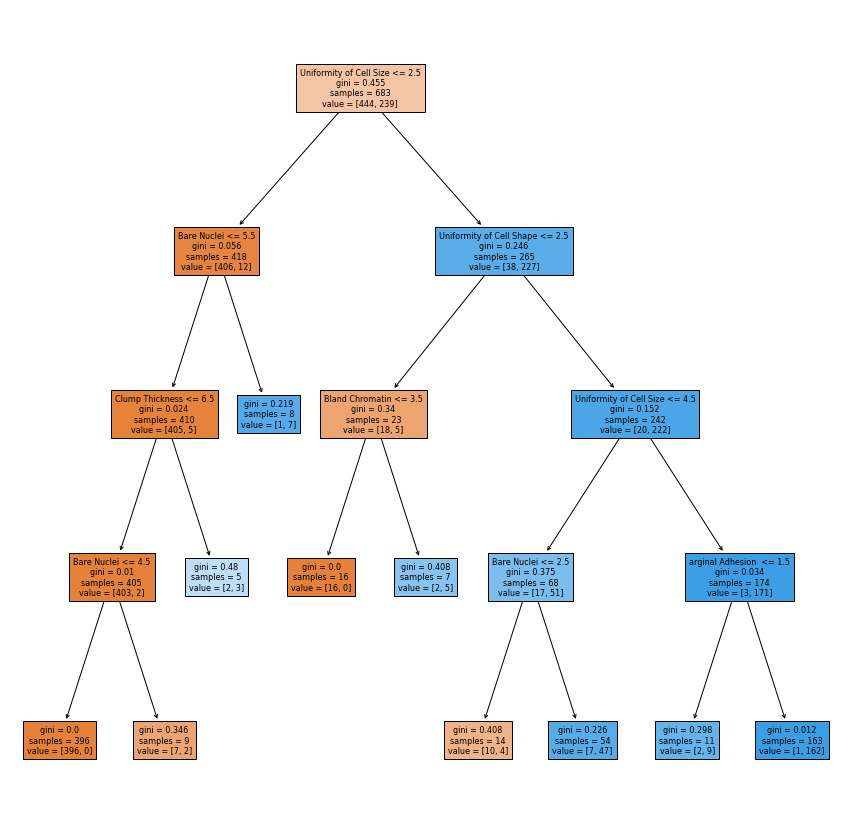

In [36]:
fig, ax = plt.subplots(figsize = (15, 15))
plot_tree(tree1, feature_names=list(X.columns), filled=True, ax = ax, fontsize=8);
print('----------------')
print(classification_report(y_test, test_preds, target_names=['Benign', 'Malignant']))
print(f'Elapsed during training: {elapsed_time_dt:.4f}s')
print(f'Accuracy score: {acs_dt:.4f}s')
print(f'Test score is: {test_score_dt: .2f}')
print(f'MSE is: {mse: .2f}')

In [37]:
knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier())])
knn_grid = GridSearchCV(knn_pipe, param_grid = {'knn__n_neighbors': range(1, 23, 2)}, scoring = 'accuracy')

knn_grid.fit(X_train, y_train)

preds = knn_grid.predict(X_test)
test_predictions = knn_grid.predict_proba(X_test)
ps= precision_score(y_test, preds)
acs = accuracy_score(y_test, preds)
rs = recall_score(y_test, preds)

best_score = knn_grid.score(X_test, y_test)
neighbors_best = knn_grid.best_params_['knn__n_neighbors']

print(f'Accuracy score is: {acs: .2f}')
print(f'Recall score is: {rs: .2f}')
print(f'Precision_score is: {ps: .2f}')
print(f'The best score is: {best_score: .2f}')
print(f'The best param is: {neighbors_best: .2f}')
print(classification_report(y_test, preds, target_names=['Benign', 'Malignant']))

Accuracy score is:  0.95
Recall score is:  0.90
Precision_score is:  0.98
The best score is:  0.95
The best param is:  13.00
              precision    recall  f1-score   support

      Benign       0.94      0.99      0.96       103
   Malignant       0.98      0.90      0.94        68

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



{'fit_time': array([0.00299931, 0.00300097, 0.00300217, 0.00300193, 0.00299859]), 'score_time': array([0.00300193, 0.00299859, 0.00299788, 0.00300002, 0.00300217]), 'test_score': array([0.97142857, 0.97058824, 0.94117647, 0.91176471, 1.        ])}
----------------
              precision    recall  f1-score   support

      Benign       0.94      0.99      0.96       103
   Malignant       0.98      0.90      0.94        68

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

Elapsed during training: 0.0030s
Accuracy score: 0.9532s
Test score is:  0.96
MSE is:  0.05


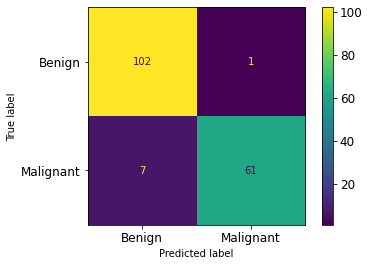

In [38]:
knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=neighbors_best))])

knn_pipe.fit(X_train, y_train)

knn_preds = knn_pipe.predict(X_test)
acs_knn = accuracy_score(y_test, knn_preds)

cancer_confusion_mat = confusion_matrix(y_test, knn_preds, labels=knn_pipe.classes_)
ConfusionMatrixDisplay.from_predictions(y_test, knn_preds, display_labels = ['Benign', 'Malignant'])

#print(knn_pipe.classes_)

mse = mean_squared_error(y_test, knn_preds)
dt_cv_result = cross_validate(knn_pipe, X_test, y_test, cv=5, n_jobs=5)

elapsed_time_knn = dt_cv_result['fit_time'].mean()
test_score_knn =  dt_cv_result['test_score'].mean()

print(dt_cv_result)
print('----------------')
print(classification_report(y_test, knn_preds, target_names=['Benign', 'Malignant']))
print(f'Elapsed during training: {elapsed_time_knn:.4f}s')
print(f'Accuracy score: {acs_knn:.4f}s')
print(f'Test score is: {test_score_knn: .2f}')
print(f'MSE is: {mse: .2f}')

In [39]:
parameters = {'kernel':('linear', 'rbf','poly')}
svc_grid = GridSearchCV(SVC(), parameters)

svc_grid_fit = svc_grid.fit(X_train, y_train)

preds = svc_grid.predict(X_test)
ps= precision_score(y_test, preds)
acs = accuracy_score(y_test, preds)
rs = recall_score(y_test, preds)

best_score = svc_grid.score(X_test, y_test)
param_best = svc_grid.best_params_
svc_best_score = svc_grid_fit.best_score_

print(f'Accuracy score is: {acs: .2f}')
print(f'Recall score is: {rs: .2f}')
print(f'Precision_score is: {ps: .2f}')
print(f'The best score is: {best_score: .2f}')
print(f'The best param is: {param_best}')
print(f'The best score is: {svc_best_score}')

print(classification_report(y_test, preds, target_names=['Benign', 'Malignant']))

Accuracy score is:  0.95
Recall score is:  0.90
Precision_score is:  0.97
The best score is:  0.95
The best param is: {'kernel': 'rbf'}
The best score is: 0.9687607081667619
              precision    recall  f1-score   support

      Benign       0.94      0.98      0.96       103
   Malignant       0.97      0.90      0.93        68

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



{'fit_time': array([0.00200033, 0.00300026, 0.00400567, 0.00400186, 0.00199652]), 'score_time': array([0.00200033, 0.00200534, 0.00199652, 0.00099993, 0.0019989 ]), 'test_score': array([1.        , 1.        , 0.94117647, 0.97058824, 1.        ])}
----------------
              precision    recall  f1-score   support

      Benign       0.94      0.98      0.96       103
   Malignant       0.97      0.90      0.93        68

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Elapsed during training: 0.0030s
Accuracy score: 0.9474s
Test score is:  0.98
MSE is:  0.05


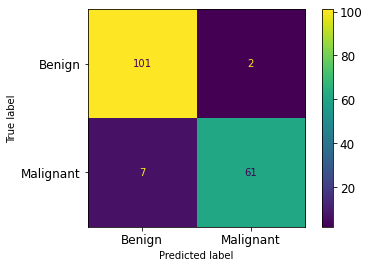

In [40]:
svc_polyclass = SVC(kernel=list(param_best.values())[0])

svc_poly = svc_polyclass.fit(X_train, y_train)

svc_preds = svc_poly.predict(X_test)
acs_svc = accuracy_score(y_test, svc_preds)

cancer_confusion_mat = confusion_matrix(y_test, svc_preds, labels=["0", "1"])
ConfusionMatrixDisplay.from_predictions(y_test, svc_preds, display_labels = ['Benign', 'Malignant'])

mse = mean_squared_error(y_test, svc_preds)
svc_cv_result = cross_validate(svc_polyclass, X_test, y_test, cv=5, n_jobs=5)

elapsed_time_svc = svc_cv_result['fit_time'].mean()
test_score_svc =  svc_cv_result['test_score'].mean()

print(svc_cv_result)
print('----------------')
print(classification_report(y_test, svc_preds, target_names=['Benign', 'Malignant']))
print(f'Elapsed during training: {elapsed_time_svc:.4f}s')
print(f'Accuracy score: {acs_svc:.4f}s')
print(f'Test score is: {test_score_svc: .2f}')
print(f'MSE is: {mse: .2f}')

                Model  Fit Time  Accuracy/Score  Test score
0    LinearRegression  0.018992        0.846980    0.432937
1               Ridge  0.004402        0.795070    0.792355
2               Lasso  0.299205        0.790027    0.788635
3  LogisticRegression  0.007600        0.918129    0.912101
4        DecisionTree  0.003204        0.959064    0.935798
5                 Knn  0.003001        0.953216    0.958992
6                 SVC  0.003001        0.947368    0.982353


Text(0, 0.5, 'Fit time & Accuracy & Test score')

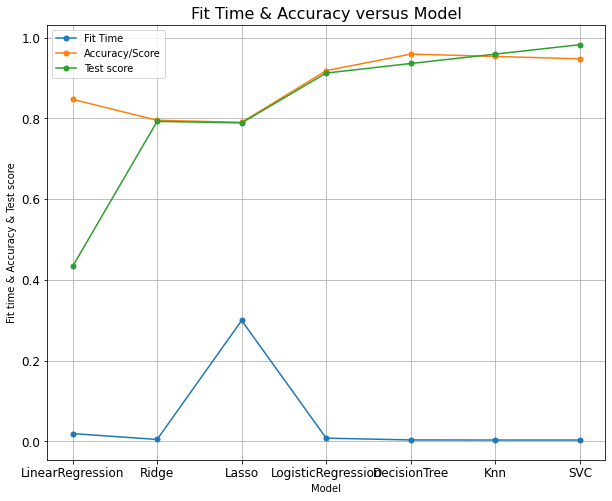

In [41]:
SearchTime = pd.DataFrame(columns = ['Model','Fit Time', 'Accuracy/Score', 'Test score'])
SearchTime.loc[len(SearchTime.index)] = ['LinearRegression', elapsed_time_lin, s_lin, test_score_lin]
SearchTime.loc[len(SearchTime.index)] = ['Ridge', elapsed_time_ridge, s_ridge, test_score_ridge]
SearchTime.loc[len(SearchTime.index)] = ['Lasso', elapsed_time_lasso, s_lasso, test_score_lasso]
SearchTime.loc[len(SearchTime.index)] = ['LogisticRegression', elapsed_time_lr, acs_lr, test_score_lr]
SearchTime.loc[len(SearchTime.index)] = ['DecisionTree',  elapsed_time_dt, acs_dt, test_score_dt]
SearchTime.loc[len(SearchTime.index)] = ['Knn',  elapsed_time_knn, acs_knn, test_score_knn]
SearchTime.loc[len(SearchTime.index)] = ['SVC',  elapsed_time_svc, acs_svc, test_score_svc]
print(SearchTime)
ax = SearchTime.plot(x='Model', y=['Fit Time', 'Accuracy/Score', 'Test score'], figsize=(10,8), grid=True,  marker='.', markersize=10, title='Fit Time & Accuracy versus Model')
ax.set_ylabel("Fit time & Accuracy & Test score")